### 금융 시장의 수익률 (Financial Market Return)
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 복리계산과 연율화(1년 간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로  
  (1 + return)으로 계산할 경우 복잡하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻는 이득이 훨씬 많고, 국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, 로그를 취하는 것은 정밀성보다 편의성을 높인 것으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만, 실제 금융시장에서는
  최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게 된다.
- 또한, return에 로그를 취하면 우측으로 취우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸 이유가 없다.

<img src="./images/log_return.png">

In [1]:
import yfinance as yf

# VIX는 향후 30일간 S&P 500 지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN',
           'GS', 'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']

f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8600,1132.9900,20.04,174.0200
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.0200
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.7600
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.2100
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,195.8700,181.2800,1.0882,34.7900,217.82,461.6800,30.7800,424.0100,534.6700,5354.0298,12.63,140.8300
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.3800
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.2000


In [2]:
# 참고
# 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex으로 변환
# pd.read_csv('path', index_col='날짜 컬럼명', parse_dates=True)

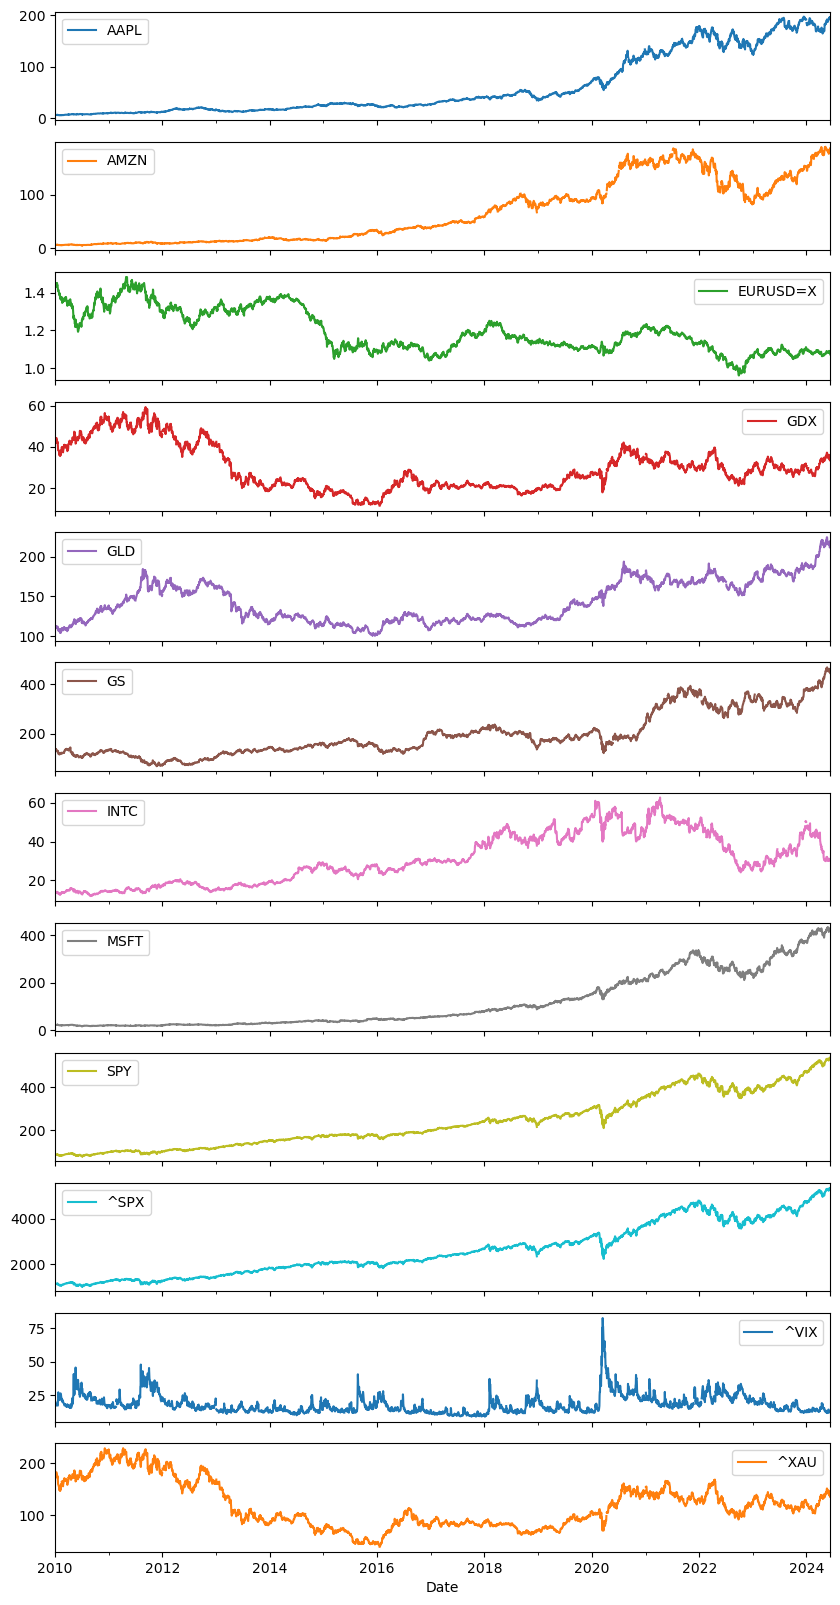

In [3]:
import matplotlib.pyplot as plt
f_df.plot(figsize=(10, 20), subplots=True)
plt.show()

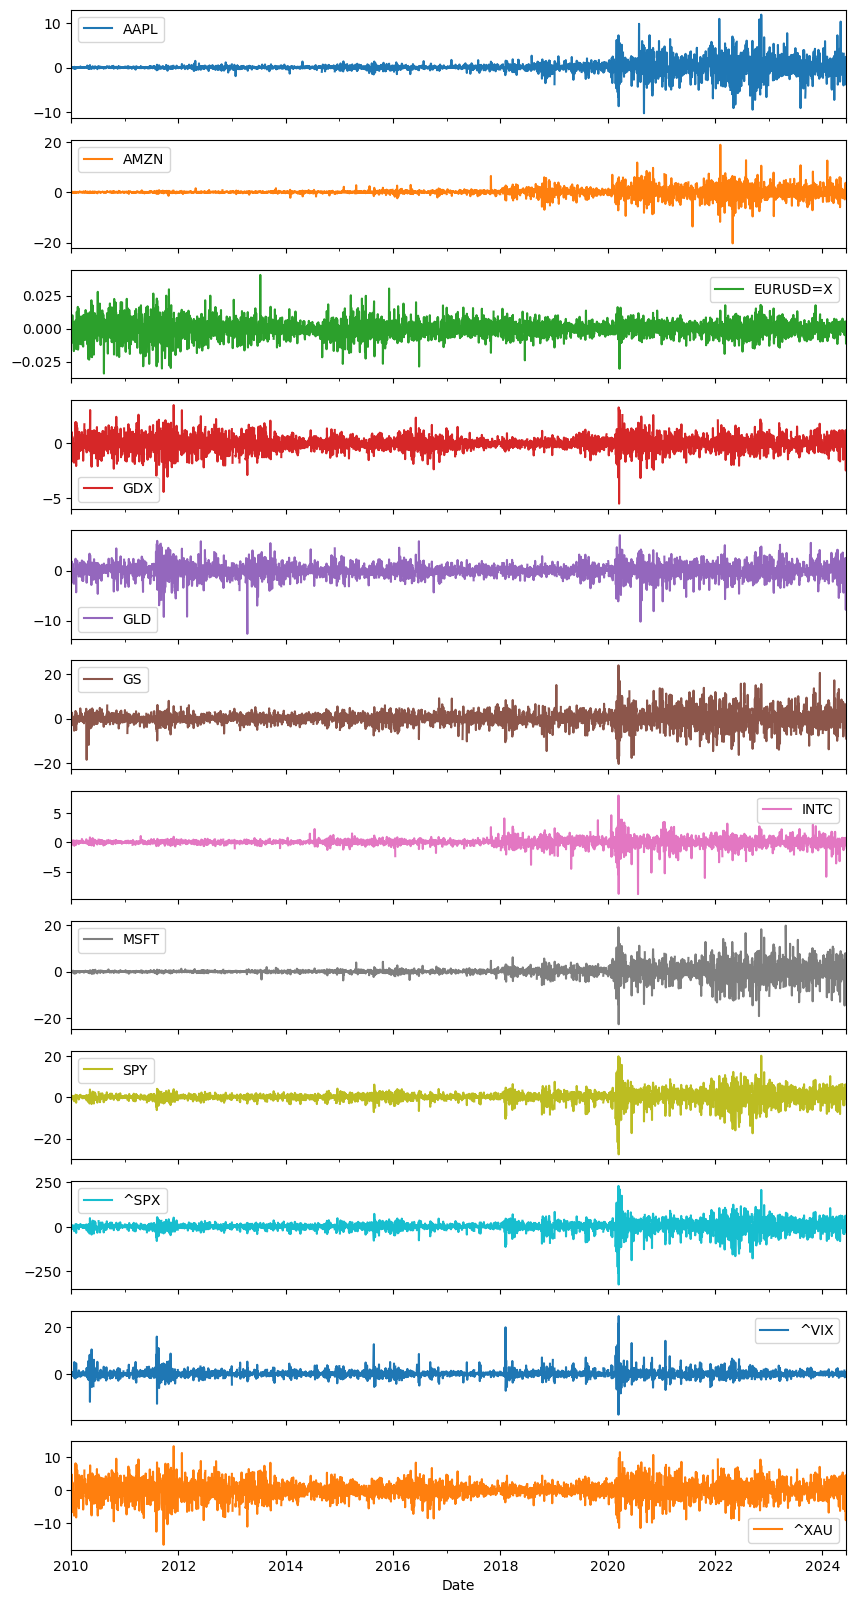

In [4]:
import matplotlib.pyplot as plt
f_df.diff().plot(figsize=(10, 20), subplots=True)
plt.show()

C:\Users\kangh\AppData\Local\Temp\ipykernel_11068\3958772669.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Ticker'>

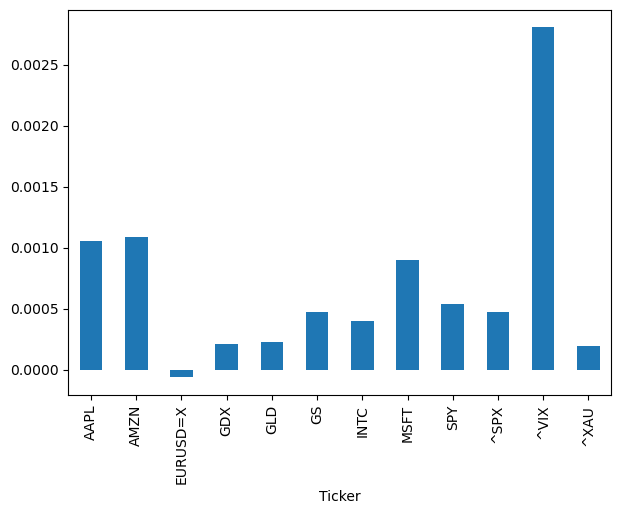

In [5]:
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))

In [6]:
display(f_df.shift(1).head(4))
display(f_df.head(4))
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7606,13.6604,23.3894,86.86,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5871,109.7,137.1432,13.6539,23.3970,87.09,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8600,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8600,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21


In [7]:
import numpy as np

# shift(1)을 통해 비율을 구함.
# 값이 크게 나타나기에 log를 취해줌.
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009596,-0.000911,0.017526,-0.000476,0.000325,0.002644,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.023999,0.016365,-0.010731,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004876,-0.006207,0.019379,-0.009658,-0.010457,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,0.007791,0.010759,-0.002295,0.017689,0.011776,0.013915,0.024668,0.018904,0.011815,0.011778,-0.041107,0.015601
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227


<Axes: xlabel='Date'>

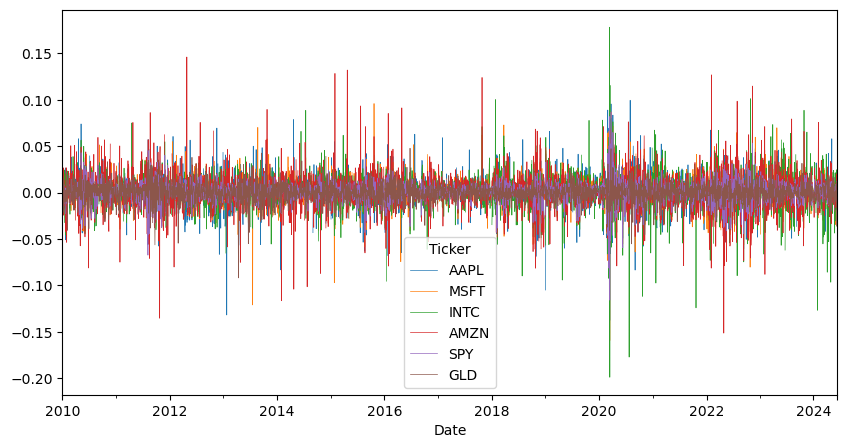

In [8]:
rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [9]:
# 연율화
# 연간 영업일 (약 252일로 계산)
rate_f_df.mean() * 252

Ticker
AAPL        0.231638
AMZN        0.201221
EURUSD=X   -0.020615
GDX        -0.013978
GLD         0.039158
GS          0.094629
INTC        0.053507
MSFT        0.196701
SPY         0.128583
^SPX        0.110381
^VIX       -0.341383
^XAU       -0.015223
dtype: float64

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [11]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.003972,AAPL
1,1.688426,AMZN
2,1.005266,EURUSD=X
3,23.014812,GDX
4,2.392771,GLD
5,2.326581,GS
6,1.759423,INTC
7,2.626582,MSFT
8,402.740736,SPY
9,401.699755,^SPX


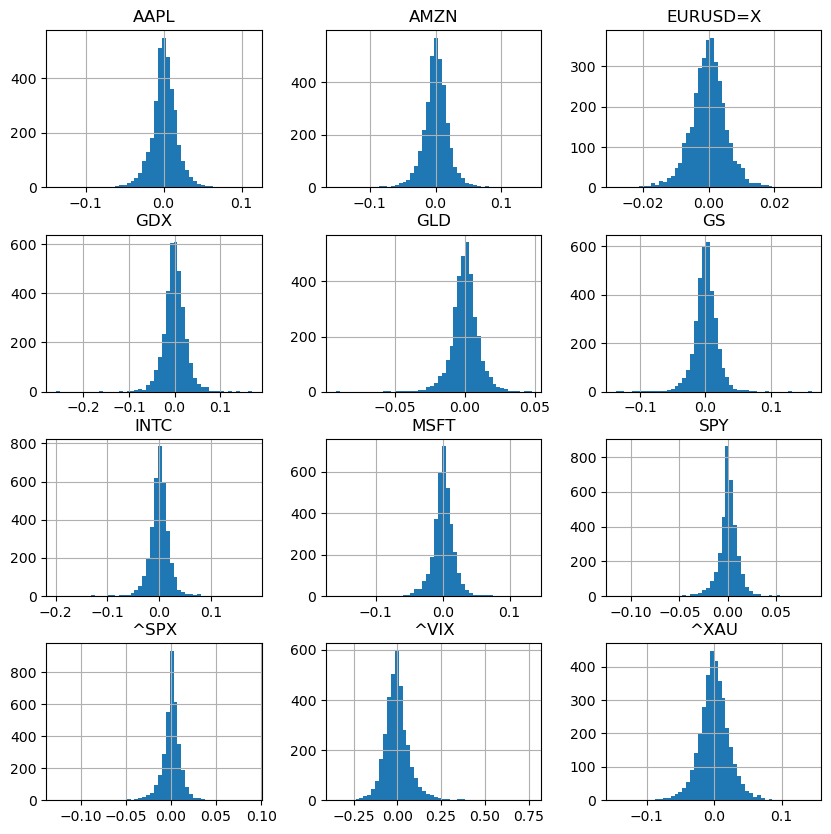

In [12]:
rate_f_df.hist(figsize=(10, 10), bins=50)
plt.show()

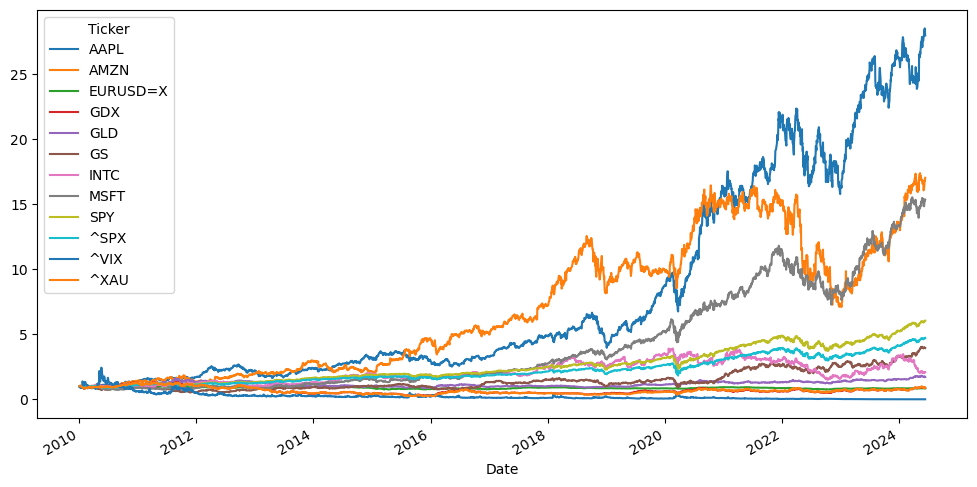

In [13]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

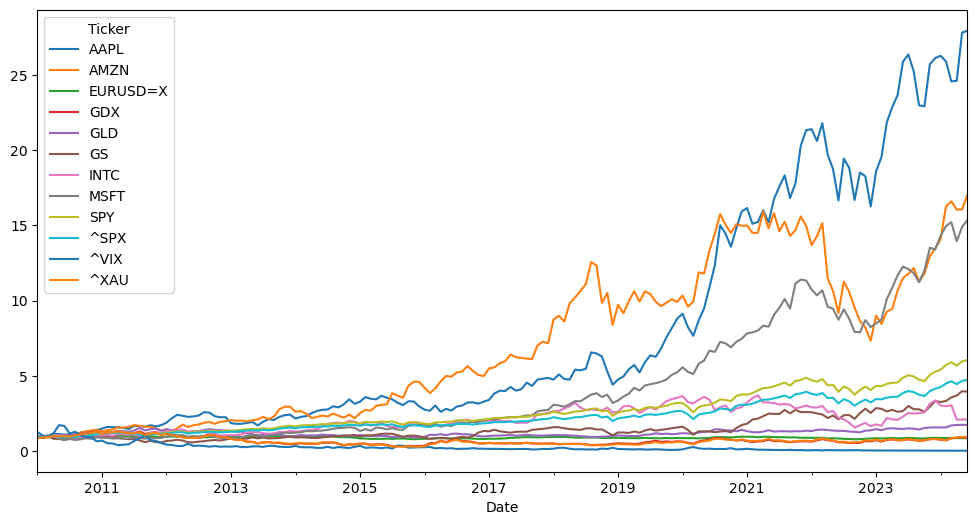

In [14]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [15]:
amzn_df = f_df[['AMZN']].dropna()
amzn_df

Ticker,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760
...,...
2024-06-05,181.2800
2024-06-06,185.0000
2024-06-07,184.3000


In [16]:
window = 20

amzn_df['min'] = amzn_df['AMZN'].rolling(window=window).min()
amzn_df['mean'] = amzn_df['AMZN'].rolling(window=window).mean()
amzn_df['std'] = amzn_df['AMZN'].rolling(window=window).std()
amzn_df['median'] = amzn_df['AMZN'].rolling(window=window).median()
amzn_df['max'] = amzn_df['AMZN'].rolling(window=window).max()

amzn_df.dropna()

Ticker,AMZN,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.9435,5.9435,6.349775,0.236046,6.36225,6.7345
2010-02-02,5.9060,5.9060,6.310325,0.241189,6.34400,6.7345
2010-02-03,5.9550,5.9060,6.271350,0.231837,6.31625,6.6760
2010-02-04,5.7970,5.7970,6.230575,0.240240,6.29525,6.6760
2010-02-05,5.8695,5.7970,6.199050,0.244358,6.27975,6.6760
...,...,...,...,...,...,...
2024-06-05,181.2800,176.4400,183.172500,3.507785,183.14000,189.5000
2024-06-06,185.0000,176.4400,183.022500,3.351132,183.14000,189.5000
2024-06-07,184.3000,176.4400,182.762500,3.006078,183.14000,187.4800


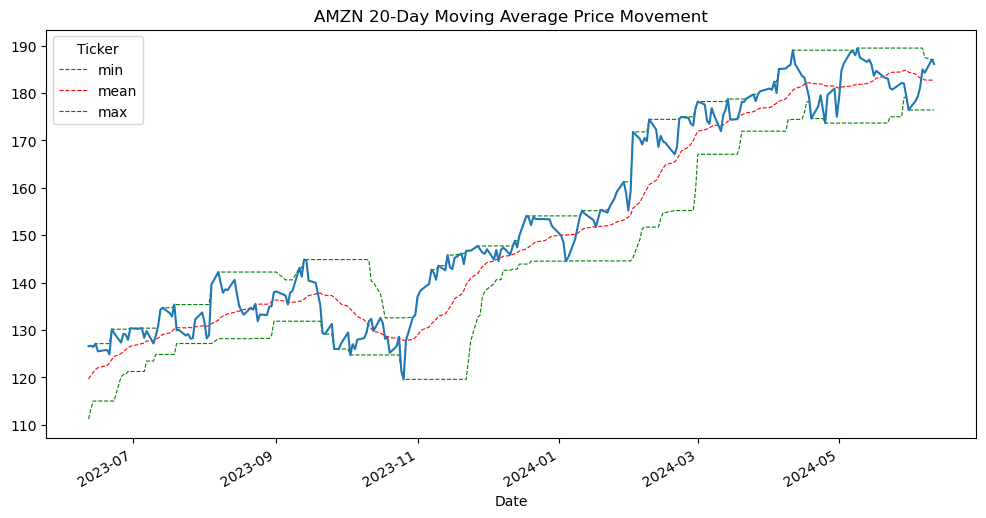

In [17]:
import matplotlib.pyplot as plt

# 각 라그 값 별로, 최소, 평균, 최대 값을 구함.
ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
amzn_df['AMZN'].iloc[-252:].plot(ax=ax)
plt.title("AMZN 20-Day Moving Average Price Movement")
plt.show()

In [18]:
# SMA (Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term
amzn_df[['AMZN', 'SMA1', 'SMA2']].tail()

Ticker,AMZN,SMA1,SMA2
Date,,,
2024-06-05,181.280,183.438571,152.038452
2024-06-06,185.000,183.259524,152.270159
2024-06-07,184.300,183.083333,152.520437
2024-06-10,187.060,182.967143,152.769683
2024-06-11,186.135,182.903095,153.018512


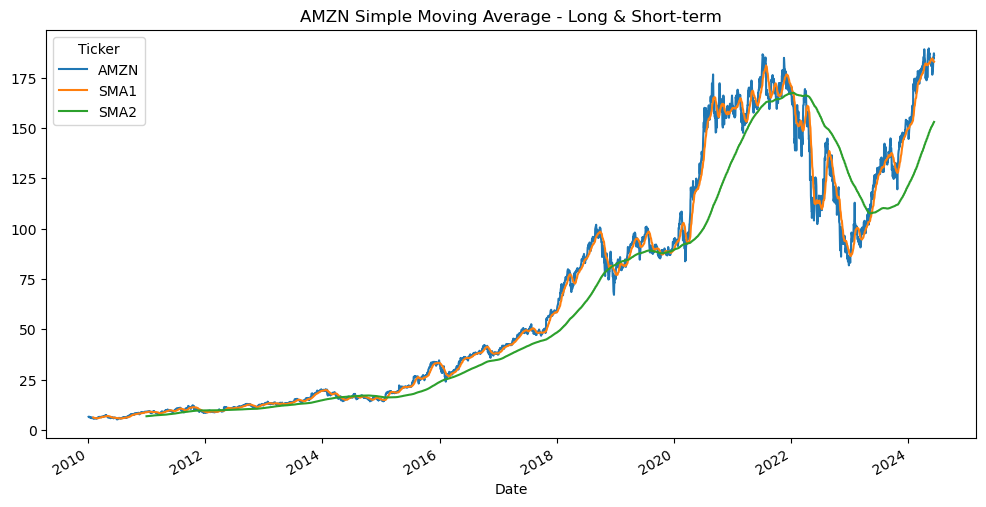

In [19]:
amzn_df[['AMZN', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")
plt.show()

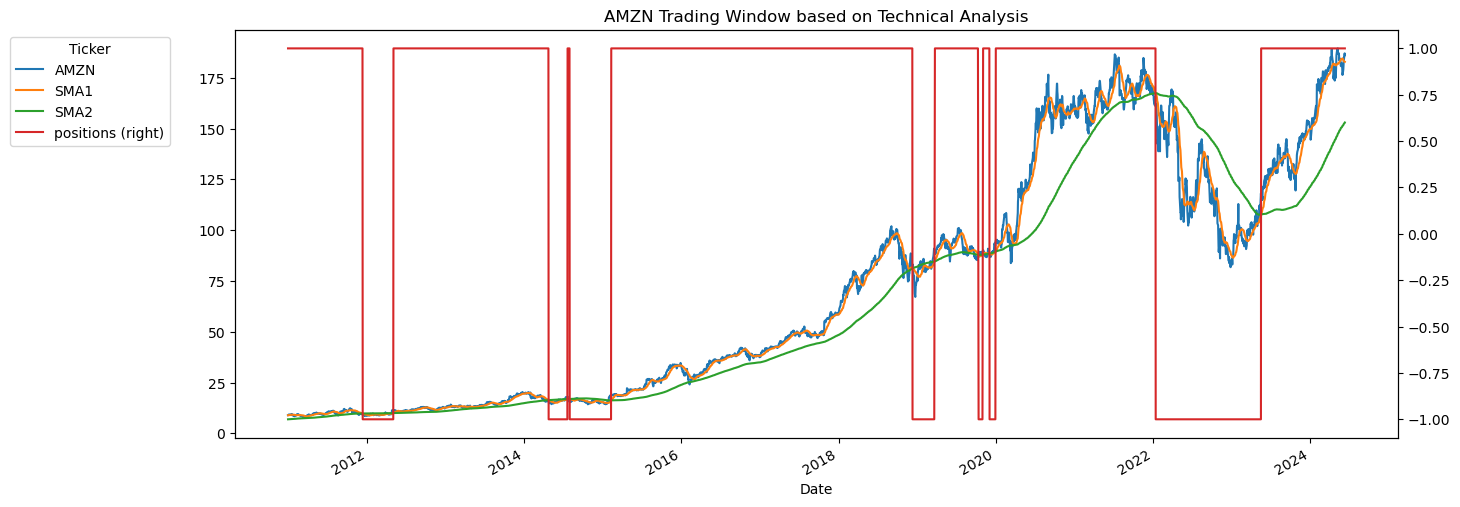

In [20]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
amzn_df.dropna(inplace=True)

amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = amzn_df[['AMZN', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AMZN Trading Window based on Technical Analysis")
plt.show()

In [21]:
aapl_df = f_df[['AAPL']].dropna()
aapl_df

Ticker,AAPL
Date,
2010-01-04,6.4620
2010-01-05,6.4731
2010-01-06,6.3702
2010-01-07,6.3584
2010-01-08,6.4007
...,...
2024-06-04,194.3500
2024-06-05,195.8700
2024-06-06,194.4800


In [22]:
window = 20

aapl_df['min'] = aapl_df['AAPL'].rolling(window=window).min()
aapl_df['mean'] = aapl_df['AAPL'].rolling(window=window).mean()
aapl_df['std'] = aapl_df['AAPL'].rolling(window=window).std()
aapl_df['median'] = aapl_df['AAPL'].rolling(window=window).median()
aapl_df['max'] = aapl_df['AAPL'].rolling(window=window).max()

aapl_df.dropna()

Ticker,AAPL,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.8798,5.7992,6.252300,0.197364,6.30315,6.4931
2010-02-02,5.9139,5.7992,6.224895,0.204633,6.27975,6.4931
2010-02-03,6.0157,5.7992,6.202025,0.200960,6.27450,6.4931
2010-02-04,5.7989,5.7989,6.173460,0.215849,6.24520,6.4931
2010-02-05,5.9019,5.7989,6.150635,0.219371,6.21815,6.4931
...,...,...,...,...,...,...
2024-06-04,194.3500,182.1529,188.925270,3.664128,189.92500,194.3500
2024-06-05,195.8700,182.4925,189.611125,3.613186,189.98500,195.8700
2024-06-06,194.4800,183.0500,190.210500,3.355226,190.14000,195.8700


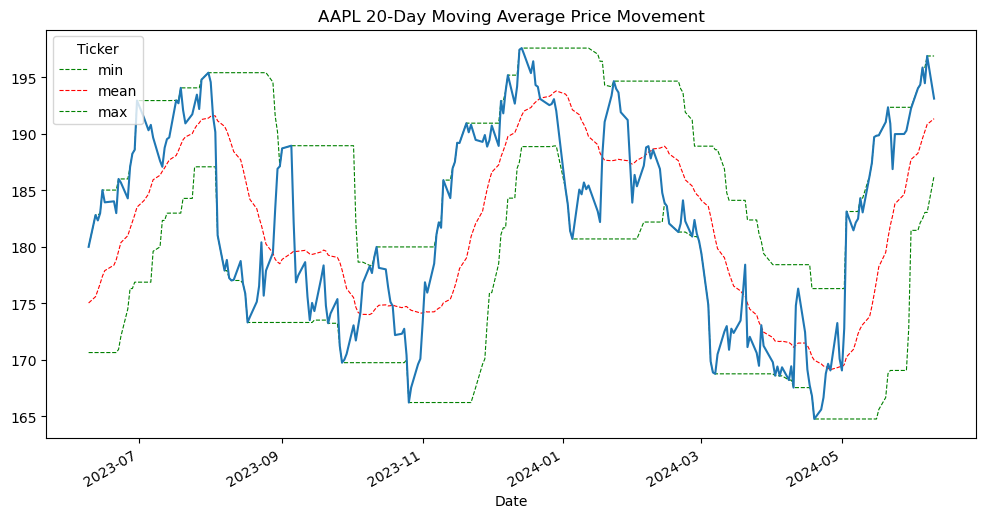

In [23]:
import matplotlib.pyplot as plt

# 각 라그 값 별로, 최소, 평균, 최대 값을 구함.
ax = aapl_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
aapl_df['AAPL'].iloc[-252:].plot(ax=ax)
plt.title("AAPL 20-Day Moving Average Price Movement")
plt.show()

In [24]:
# SMA (Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

aapl_df['SMA1'] = aapl_df['AAPL'].rolling(window=21).mean() #short-term
aapl_df['SMA2'] = aapl_df['AAPL'].rolling(window=252).mean() #long-term
aapl_df[['AAPL', 'SMA1', 'SMA2']].tail()

Ticker,AAPL,SMA1,SMA2
Date,,,
2024-06-04,194.35,188.569967,182.013516
2024-06-05,195.87,189.255971,182.081923
2024-06-06,194.48,189.842976,182.146275
2024-06-07,196.89,190.528571,182.225678
2024-06-10,193.12,190.947619,182.279265


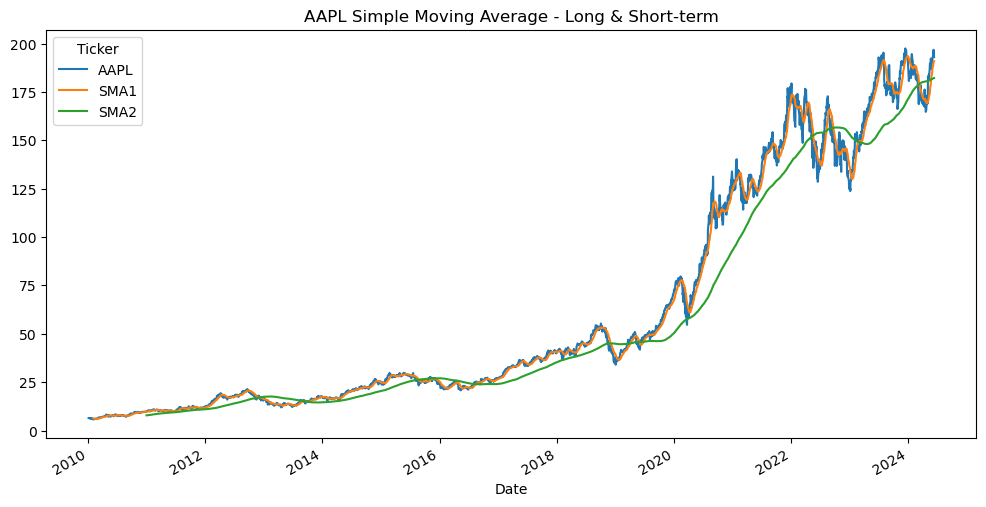

In [25]:
aapl_df[['AAPL', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AAPL Simple Moving Average - Long & Short-term")
plt.show()

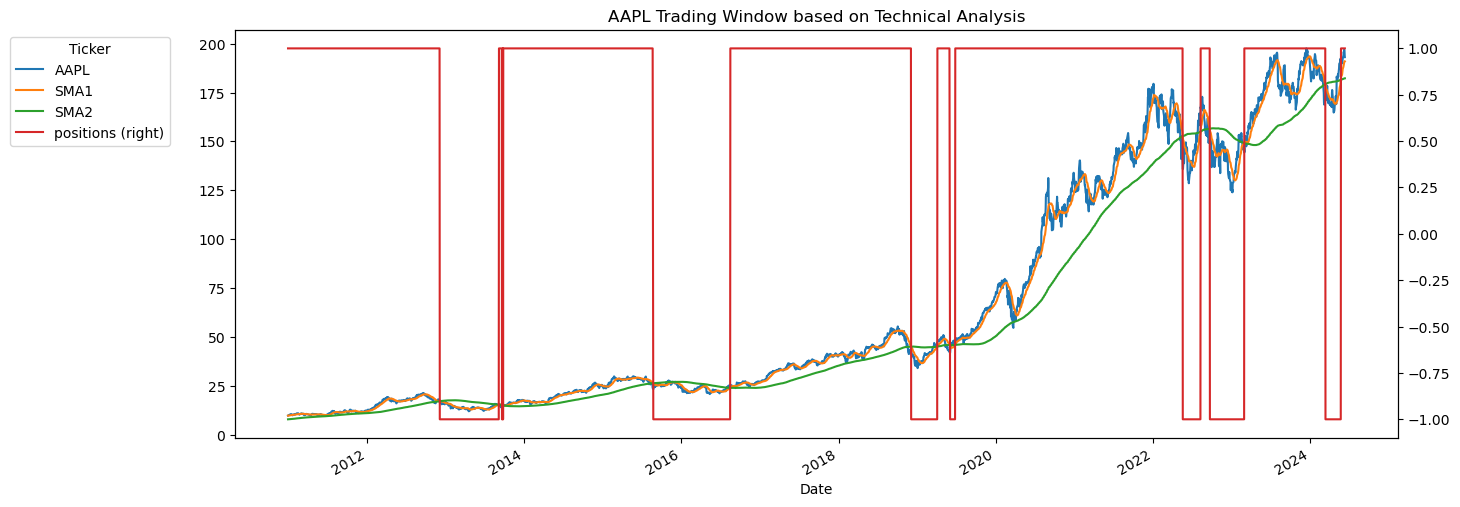

In [26]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
aapl_df.dropna(inplace=True)

aapl_df['positions'] = np.where(aapl_df['SMA1'] > aapl_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = aapl_df[['AAPL', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AAPL Trading Window based on Technical Analysis")
plt.show()